In [ ]:
from typing import TypedDict

from langgraph.graph import END, START, StateGraph
from tavily import TavilyClient

In [2]:
import os

from dotenv import load_dotenv

load_dotenv()

OPENWEATHERMAP_API_KEY = os.getenv("OPENWEATHERMAP_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, max_tokens=100)

In [ ]:
class GraphState(TypedDict):
    """
    State for the graph

    Args:
        question: The question to be answered
        generation: LLM generation
        web_search: Whether to use web search
    """

    question: str
    answer: str


In [ ]:
def flight_search(state: GraphState) -> GraphState:
    """
    Flight search node
    """
    client = TavilyClient(TAVILY_API_KEY)
    query = state["question"]
    # print(f"Query: {query}")
    results = client.search(query, max_results=10)["results"]
    # print(f"Results: {results}")

    summaries = "\n".join(
        f"{res['title']}: {res['content']} (score: {res['score']})" for res in results
    )
    prompt = f"Question: {query}\n\nSearch Results:\n{summaries}\n\nAnswer:"

    return {"question": query, "answer": llm.invoke(prompt)}


In [49]:
workflow = StateGraph(GraphState)
workflow.add_node("flight_search", flight_search)
workflow.add_edge(START, "flight_search")
workflow.add_edge("flight_search", END)
workflow = workflow.compile()


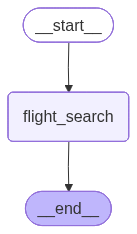

In [50]:
from IPython.display import Image

display(Image(workflow.get_graph().draw_mermaid_png()))

In [55]:
responses = workflow.invoke(
    {
        "question": "Search for a single best flight from Boston, MA, USA to Tokyo, Japan?"
    }
)

print(responses["answer"])

content="The best flight option from Boston, MA, USA to Tokyo, Japan is currently available through Japan Airlines (JAL), with round-trip fares starting at approximately $863. This airline is popular among travelers and has received positive reviews for its service. For one-way flights, prices start at around $485. If you're looking for a comfortable and reliable option, JAL is highly recommended." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 880, 'total_tokens': 957, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CZ9qF6vJIRVwWcxFRXgOrV0jN8zQY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--c4f92527-dd5f-46

================================ Human Message =================================

Search for the best flight from Boston, MA, USA to Tokyo, Japan?
================================== Ai Message ==================================

To find the best flight from Boston, MA (BOS) to Tokyo, Japan (TYO), here are some options based on recent search results:

1. **Japan Airlines (JAL)**: Offers competitive fares with round-trip prices starting around $863. JAL is known for its quality service and has received positive reviews.

2. **American Airlines**: Average ratings are around 3.0, and they provide various flight options. Prices can start at approximately $485 for one-way


In [ ]:
from datetime import datetime, timedelta

start_date = "2025-11-13"
end_date = (datetime.strptime(start_date, "%Y-%m-%d") + timedelta(days=2)).strftime(
    "%Y-%m-%d"
)

print(f"Travel window: {start_date} to {end_date}")

Travel window: 2025-11-13 to 2025-11-15


In [2]:
import json

json_path = "../backend/artifacts/model_inputs/user_surveys/final_submissions.json"

with open(json_path, "r") as f:
    data = json.load(f)

print(data)


{'travel_date': '2025-11-13', 'travel_duration': 2, 'submissions': [{'name': 'alex', 'phone': 1234123412, 'country_code': '+1', 'budget_category': 'medium', 'budget_range': [1000, 2500], 'current_location': 'Austin, Texas', 'travel_date': None, 'travel_duration': None, 'preferences': ['City sightseeing', 'Outdoor adventures', 'Nightlife'], 'added_at': '2025-11-07T15:03:29.579908'}, {'name': 'max', 'phone': 1231231234, 'country_code': '+1', 'budget_category': 'medium', 'budget_range': [1000, 2500], 'current_location': 'Chicago, Illinois', 'travel_date': None, 'travel_duration': None, 'preferences': ['Beaches', 'Outdoor adventures', 'Nightlife'], 'added_at': '2025-11-07T15:03:47.615758'}, {'name': 'jordan', 'phone': 4141414141, 'country_code': '+1', 'budget_category': 'high', 'budget_range': [2500, 5000], 'current_location': 'New York, New York', 'travel_date': None, 'travel_duration': None, 'preferences': ['City sightseeing', 'Outdoor adventures', 'Food exploration', 'Shopping'], 'added

In [ ]:
import sys
from pathlib import Path

# Add project root to Python path so we can import packvote
# Notebook is in src/packvote/notebooks/, so go up 3 levels to project root
notebook_dir = Path().resolve()
project_root = notebook_dir.parent.parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


In [ ]:
travel_date = data.pop("travel_date")
travel_duration = data.pop("travel_duration")

print(travel_date)
print(travel_duration)


2025-11-13
2


In [6]:
from packvote.backend.pipelines import get_user_prefs

user_surveys = get_user_prefs(
    user_survey_file_path="../backend/artifacts/model_inputs/user_surveys/final_submissions.json"
)

user_surveys

ModuleNotFoundError: No module named 'packvote'